In [1]:
%matplotlib inline

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, HBox, Dropdown
from IPython.display import clear_output

df = sns.load_dataset('tips')


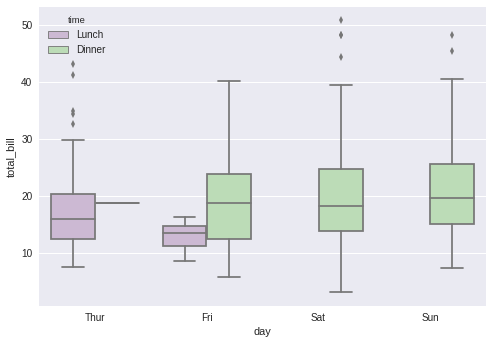

In [2]:
sns.boxplot(x="day", y="total_bill", hue="time", data=df, palette="PRGn")
y_columns = [name for name in df.columns if df[name].dtype in [float, int]]
x_columns = [name for name in df.columns if name not in y_columns]

# ipywidgets @interact

In [3]:
@interact(x=x_columns, y=y_columns, hue=x_columns)
def interact_plot(x, y, hue):
    sns.boxplot(x=x, y=y, hue=hue, data=df, palette="PRGn")
    plt.show()
    
    #plt.clf() clears an axis, i.e. the currently active axis in the current figure. 
    #It leaves the other axes untouched.
    #plt.clf()
    
    #plt.cla() clears the entire current figure with all its axes, 
    #but leaves the window opened, such that it may be reused for other plots.
    #plt.cla() 
    
    #plt.close() closes a window, which will be the current window, if not specified otherwise.
    plt.close()
   

# ipywidgets @interact with labels

In [193]:
@interact_manual(x=Dropdown(description='Plot', options=x_columns, value='day'), 
          y=Dropdown(description='versus', options=y_columns, value='total_bill'),
          hue=Dropdown(description='colored by', options=x_columns, value='sex') )

def interact_plot(x, y, hue):
    sns.boxplot(x=x, y=y, hue=hue, data=df, palette="PRGn")
    plt.show()
    plt.close()

In [138]:
button = widgets.Button(description="Click Me!")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)

Button clicked.


# ipywidgets manual

In [102]:
def hbox_plot(widget):
    sns.boxplot(x=x_drop.value, y=y_drop.value, hue=hue_drop.value, data=df, palette="PRGn")
    clear_output(wait=True)

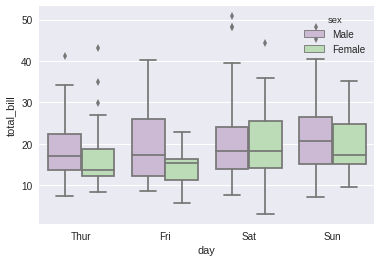

In [103]:
x_drop = Dropdown(description='Plot', options=x_columns, value='day')
y_drop = Dropdown(description='versus', options=y_columns, value='total_bill')
hue_drop = Dropdown(description='colored by', options=x_columns, value='sex')

x_drop.observe(hbox_plot, names='value')
y_drop.observe(hbox_plot, names='value')
hue_drop.observe(hbox_plot, names='value')

box = HBox([x_drop, y_drop, hue_drop])
box.on_displayed(hbox_plot)
box

# Plot 

In [68]:
@interact(hue=[name for name in df.columns if str(df[name].dtype) in [str('object'), str('category')]])
def plot(hue):
    _ = sns.pairplot(df, hue=hue)
    plt.show()
    plt.close()